# Principal Component Analysis

## loading the data

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

file_names = [
    "../../train/02-14-2018_clean.csv",
    "../../train/02-15-2018_clean.csv",
    "../../train/02-16-2018_clean.csv",
    "../../train/02-20-2018_clean.csv",
    "../../train/02-21-2018_clean.csv",
    "../../train/02-22-2018_clean.csv",
    "../../train/02-23-2018_clean.csv",
    "../../train/02-28-2018_clean.csv",
    "../../train/03-01-2018_clean.csv",
    "../../train/03-02-2018_clean.csv"
]

dfs = []
for file_name in file_names:
    df = pd.read_csv(file_name)
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

test = pd.read_csv("../../test/test.csv")
test = test.drop(columns='Unnamed: 0')

print(df.shape)
print(test.shape)

(12639793, 71)
(3159955, 71)


## Splitting the data

In [2]:
X_train = df.drop('Label', axis=1)
y_train = df['Label']

X_test = test.drop('Label', axis=1)
y_test = test['Label']

## Applying PCA

In [3]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

## Applying the XGBoost algorithm

In [4]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [5]:
y_pred = xgb_model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9781189922008383
Precision: 0.9747854074506528
Recall: 0.9781189922008383
F1-score: 0.9733971686188482
Confusion Matrix:
 [[2665072    2303     402   20200     304       1]
 [    336   55470       0     807       0       0]
 [    273       5   30590     682       0       0]
 [   8662    2377     770  339156       0       0]
 [  31635      34      24     312     519       0]
 [     10       0       3       3       0       5]]


## Confusion Matrix

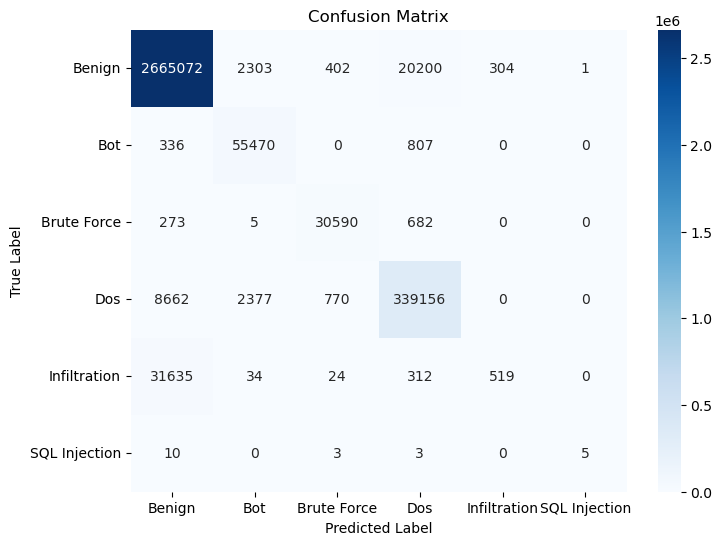

In [6]:
label_dict = {
    0: 'Benign',
    1: 'Bot',
    2: 'Brute Force',
    3: 'Dos',
    4: 'Infiltration',
    5: 'SQL Injection'
}

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_dict.values(), yticklabels=label_dict.values())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Saving the model

In [7]:
import pickle

model_file_path = '../../models/xgboost_PCA.pkl'
with open(model_file_path, 'wb') as f:
    pickle.dump(xgb_model, f)